In [30]:
import copy
import random
import os
import time
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingWarmRestarts
from torchvision import transforms
from torchvision.models import vgg11
from torch.utils.data import Dataset, DataLoader,random_split, SubsetRandomSampler
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import TSNE

from focal_loss import FocalLoss
from efficientnet_pytorch import EfficientNet
from dataset import TrainDataset, TestDataset, img_transform, TrainDatasetAgeAugmentation, TrainDatasetWithAge
from avgMeter import AverageMeter
from acc_per_label import AccPerLabel

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [2]:
train_root = '/opt/ml/input/data/train/images'
model_to_use = '/opt/ml/code/trained_models/effnetb0-batchsize_128-lr_0001-epoch_20-cosin_warm_restart-nofreeze-fix_data-no_overlap-age_aug58-Hflip05-center_crop500250.pt'

In [3]:
transform = img_transform()
data = TrainDatasetWithAge(train_root, input_size = 224, transform = transform)

In [12]:
batch_size = 128

indices = list(range(len(data)))
split_idx = int(len(data) * 0.8)
train_idx, valid_idx = indices[:split_idx], indices[split_idx:]

# train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# train_loader = DataLoader(data, batch_size=batch_size, num_workers = 4, sampler=train_sampler, pin_memory=True, shuffle=False)
valid_loader = DataLoader(data, batch_size=batch_size, num_workers = 4, sampler=valid_sampler, pin_memory=True, shuffle=False)

In [5]:
device = torch.device('cuda')
model = torch.load(model_to_use).to(device)

model.eval()
print('haha')

haha


In [18]:
type(X_test_2D[0])

numpy.ndarray

In [22]:
type(encoded)

numpy.ndarray

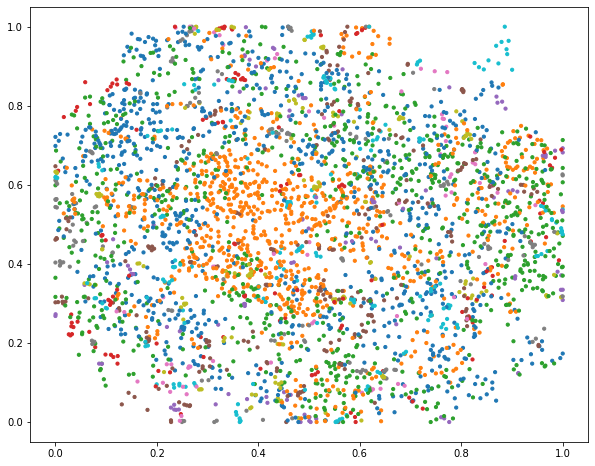

In [27]:
plt.figure(figsize=(10, 8))

for imgs, labels, ages in valid_loader:
    imgs, labels = imgs.float().cuda(), labels.cuda()
    with torch.no_grad():
        encoded = model(imgs)
        
    encoded = encoded.cpu().detach().numpy()
    labels = labels.cpu()
    tsne = TSNE(perplexity=50)   
    X_test_2D = tsne.fit_transform(encoded)
    X_test_2D = (X_test_2D - X_test_2D.min()) / (X_test_2D.max() - X_test_2D.min())

    plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=labels, s=10, cmap="tab10")
    

No handles with labels found to put in legend.


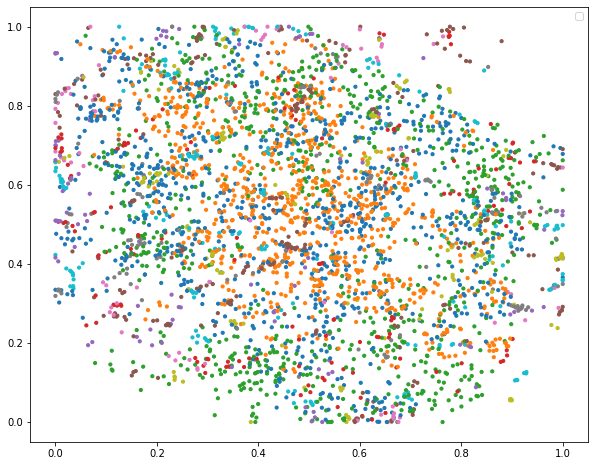

In [34]:
plt.figure(figsize=(10, 8))

for imgs, labels, ages in valid_loader:
    imgs, labels = imgs.float().cuda(), labels.cuda()
    with torch.no_grad():
        encoded = model(imgs)
        
    encoded = encoded.cpu().detach().numpy()
    labels = labels.cpu()
    tsne = TSNE(perplexity=50)   
    X_test_2D = tsne.fit_transform(encoded)
    X_test_2D = (X_test_2D - X_test_2D.min()) / (X_test_2D.max() - X_test_2D.min())

    plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=labels, s=10, cmap="tab10")
plt.legend()
plt.show()

In [31]:
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_test_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(torch.squeeze(inputs).cpu().numpy()[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(labels[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

NameError: name 'inputs' is not defined